In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [210]:
df = pd.read_csv("marketing_data.csv")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,6,1,0,0,0,0,0,1,0,Spain
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,7,5,0,0,0,0,1,1,0,Canada
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,5,2,0,0,0,0,0,0,0,USA
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,2,7,0,0,0,0,0,0,0,Australia
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,2,7,1,0,0,0,0,1,0,Spain


In [211]:
print(df.columns)

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')


In [212]:
df.columns = df.columns.str.strip()
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

When I was trying to apply the column transformer it was throwing an error that the data didn't have a column I was passing. When I checked I found Income has some extra spaces in the name so I stripped the name.

In [213]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

Since the missing values in Income column are less than 5% of the data, I chose to remove them.

In [214]:
ne_df = df.dropna()

In [215]:
ne_df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
Complain               0
Country                0
dtype: int64

In [216]:
new_df = ne_df.drop(columns = ['ID', 'Year_Birth','Dt_Customer'])
new_df.head()
print(new_df.columns)

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Response', 'Complain', 'Country'],
      dtype='object')


In [217]:
X = new_df.drop(columns = ['Response'])
y = new_df['Response']

In [218]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [219]:
X_test.shape

(444, 24)

In [220]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [221]:
transformer = ColumnTransformer(
    transformers=[
        ('ordinal', OrdinalEncoder(categories=[['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic']]), ['Education']),
        ('onehot', OneHotEncoder(sparse_output=False, drop='first'), ['Marital_Status', 'Country']),
        ('scaler', StandardScaler(), ['Income'])
    ],
    remainder='passthrough' 
)


In [222]:
X_train_transformed = transformer.fit_transform(X_train)
X_test_transformed = transformer.transform(X_test)

In [223]:
X_train = pd.DataFrame(X_train_transformed)
X_test = pd.DataFrame(X_test_transformed)

In [224]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [225]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [226]:
y_pred = model.predict(X_test)

In [227]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8941441441441441

In [228]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [229]:
pca.explained_variance_.shape

(36,)

Since components = None, we get as many PCs as many columns. We have increased the number of columns because I applied OHE to the Marital Status and Country Column. So we got a binary column for each category of both columns.

In [230]:
pca.explained_variance_ratio_

array([1.79197688e-01, 5.44871773e-02, 4.88699992e-02, 4.43624319e-02,
       4.12482956e-02, 3.77161730e-02, 3.41304863e-02, 3.31044323e-02,
       3.25182435e-02, 3.10863414e-02, 3.01244980e-02, 2.97804446e-02,
       2.94128629e-02, 2.88871806e-02, 2.76112827e-02, 2.72315090e-02,
       2.63884437e-02, 2.55250985e-02, 2.52592892e-02, 2.40816714e-02,
       2.22891266e-02, 2.07468810e-02, 1.88170951e-02, 1.68952605e-02,
       1.62122964e-02, 1.52169036e-02, 1.33174186e-02, 1.21810496e-02,
       1.14019867e-02, 1.04428607e-02, 8.85381720e-03, 8.60291193e-03,
       6.11494715e-03, 5.25245006e-03, 2.59000593e-03, 4.14403979e-05])

Here this code explain how much variance is explained by each PC. To get the optimum number of PCs we apply cumulative sum and try to find out the maximum varaince that can be explained by less PCs

In [231]:
np.cumsum(pca.explained_variance_ratio_)

array([0.17919769, 0.23368486, 0.28255486, 0.3269173 , 0.36816559,
       0.40588176, 0.44001225, 0.47311668, 0.50563493, 0.53672127,
       0.56684577, 0.59662621, 0.62603907, 0.65492625, 0.68253754,
       0.70976905, 0.73615749, 0.76168259, 0.78694188, 0.81102355,
       0.83331268, 0.85405956, 0.87287665, 0.88977191, 0.90598421,
       0.92120111, 0.93451853, 0.94669958, 0.95810157, 0.96854443,
       0.97739824, 0.98600116, 0.9921161 , 0.99736855, 0.99995856,
       1.        ])

Since here no. of PCs is 36, we can manually see when we are getting the PCs that explain most variance. But when we have a lot of columns we may plot a visualization to get that number. 

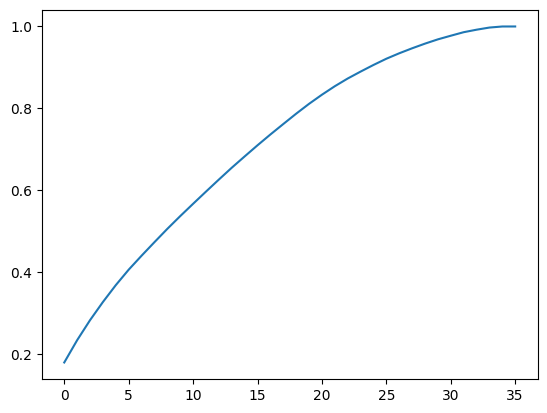

In [232]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

So I can see that 25 components explain about 91% of varaince of the data. And That i guess is enough. So I will go forward with 15 PCs. 

In [245]:
pca = PCA(n_components=25)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [246]:
model.fit(X_train_trf,y_train)

LogisticRegression()

In [247]:
y_pred = model.predict(X_test_trf)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy after PCA: {accuracy}")


Accuracy after PCA: 0.8828828828828829
